import pandas as pd
#package that allows the API to download the daily stock inex prices
#import yfinance as yf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
chakchouka = pd.read_csv('/content/drive/MyDrive/AI_Trading/MSFT2.csv')
chakchouka

FileNotFoundError: ignored

In [ ]:
chakchouka['Date']

NameError: ignored

In [ ]:
import datetime
#fonction pour faire le convertion en datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-01-03')
datetime_object

datetime.datetime(2023, 1, 3, 0, 0)

In [ ]:
chakchouka['Date'] = chakchouka['Date'].apply(str_to_datetime)
chakchouka['Date']

0     2023-01-03
1     2023-01-04
2     2023-01-05
3     2023-01-06
4     2023-01-09
         ...    
220   2023-11-16
221   2023-11-17
222   2023-11-20
223   2023-11-21
224   2023-11-22
Name: Date, Length: 225, dtype: datetime64[ns]

In [ ]:
#nrodou date houa l'index khater predicton en fonction de la date
#pop method in pandas is used to remove a column from a DataFrame and return that column.
chakchouka.index = chakchouka.pop('Date')
chakchouka

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.474350,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,227.086456,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,220.356140,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,222.953094,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,225.123825,27369800
...,...,...,...,...,...,...
2023-11-16,370.959991,376.350006,370.179993,376.170013,376.170013,27182300
2023-11-17,373.609985,374.369995,367.000000,369.850006,369.850006,40157000
2023-11-20,371.220001,378.869995,371.000000,377.440002,377.440002,52465100


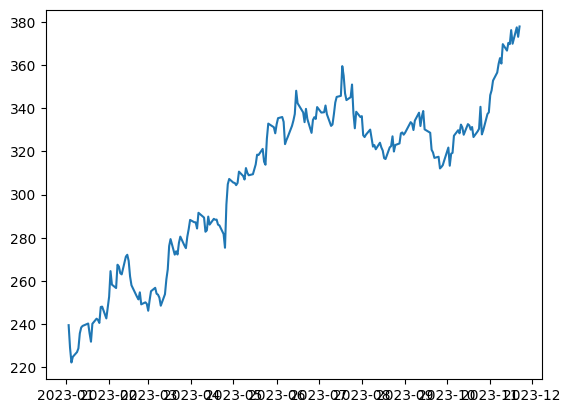

In [ ]:
import matplotlib.pyplot as plt

#chakchouka.date est l'axe des abscisses = Date et chakchouka['Close'] est l'axe des ordonnées
plt.plot(chakchouka.index, chakchouka['Close'])

<Axes: xlabel='Date'>

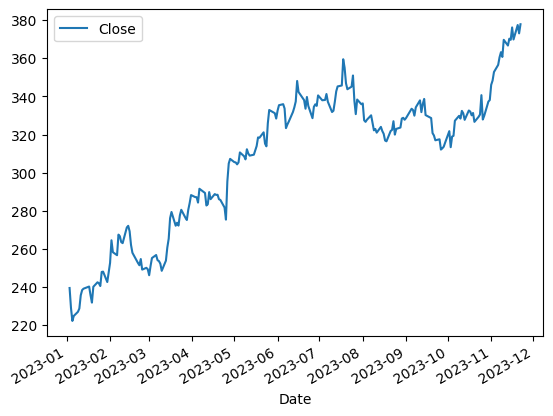

In [ ]:
#autrement et plus claire
chakchouka.plot.line(y='Close',use_index=True)

In [ ]:
del chakchouka['Adj Close']


In [ ]:
chakchouka

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,27369800
...,...,...,...,...,...
2023-11-16,370.959991,376.350006,370.179993,376.170013,27182300
2023-11-17,373.609985,374.369995,367.000000,369.850006,40157000
2023-11-20,371.220001,378.869995,371.000000,377.440002,52465100


In [ ]:
#target(reellement we don't care abt the accurate price more than the fact that tatlaa wala tahbet le lendemain)
#prediction phase
chakchouka["Tomorrow"] = chakchouka["Close"].shift(-1)
chakchouka

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,25740000,229.100006
2023-01-04,232.279999,232.869995,225.960007,229.100006,50623400,222.309998
2023-01-05,227.199997,227.550003,221.759995,222.309998,39585600,224.929993
2023-01-06,223.000000,225.759995,219.350006,224.929993,43613600,227.119995
2023-01-09,226.449997,231.240005,226.410004,227.119995,27369800,228.850006
...,...,...,...,...,...,...
2023-11-16,370.959991,376.350006,370.179993,376.170013,27182300,369.850006
2023-11-17,373.609985,374.369995,367.000000,369.850006,40157000,377.440002
2023-11-20,371.220001,378.869995,371.000000,377.440002,52465100,373.070007


In [ ]:
chakchouka["Target"] = (chakchouka["Tomorrow"]>chakchouka["Close"]).astype(int)

In [ ]:
#1 wakteli prix yzid le lendemain et 0 wakteli prix ytih le lendemain
chakchouka

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,25740000,229.100006,0
2023-01-04,232.279999,232.869995,225.960007,229.100006,50623400,222.309998,0
2023-01-05,227.199997,227.550003,221.759995,222.309998,39585600,224.929993,1
2023-01-06,223.000000,225.759995,219.350006,224.929993,43613600,227.119995,1
2023-01-09,226.449997,231.240005,226.410004,227.119995,27369800,228.850006,1
...,...,...,...,...,...,...,...
2023-11-16,370.959991,376.350006,370.179993,376.170013,27182300,369.850006,0
2023-11-17,373.609985,374.369995,367.000000,369.850006,40157000,377.440002,1
2023-11-20,371.220001,378.869995,371.000000,377.440002,52465100,373.070007,0


<Axes: xlabel='Date'>

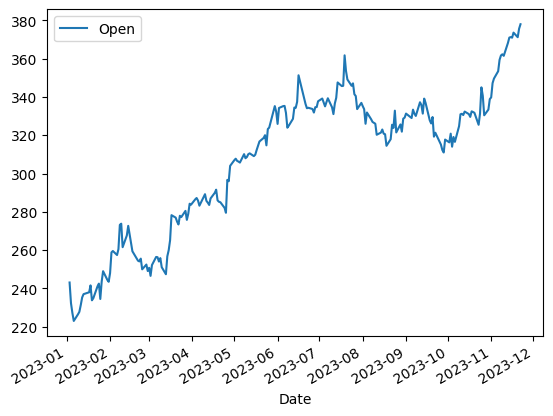

In [ ]:
#autrement et plus claire
chakchouka.plot.line(y='Open',use_index=True)

In [ ]:
#new dataframe to create from the old one (for supervised prgrm)
import numpy as np

def str_to_datetime(date_str):
    return datetime.datetime.strptime(date_str, '%Y-%m-%d')

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    #Kol target - i tmathel target i days before the target day
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-01-03'
#bch nekhdhou target date w 3 days before
windowed_df = df_to_windowed_df(chakchouka,
                                '2023-01-06',
                                '2023-11-22',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-06,239.580002,229.100006,222.309998,224.929993
1,2023-01-09,229.100006,222.309998,224.929993,227.119995
2,2023-01-10,222.309998,224.929993,227.119995,228.850006
3,2023-01-11,224.929993,227.119995,228.850006,235.770004
4,2023-01-12,227.119995,228.850006,235.770004,238.509995
...,...,...,...,...,...
217,2023-11-16,366.679993,370.269989,369.670013,376.170013
218,2023-11-17,370.269989,369.670013,376.170013,369.850006
219,2023-11-20,369.670013,376.170013,369.850006,377.440002
220,2023-11-21,376.170013,369.850006,377.440002,373.070007


In [ ]:
#The function windowed_df_to_date_X_y is designed to convert a windowed dataframe, likely created for a supervised learning task, into separate arrays for dates, input features (X), and target values (Y).
def windowed_df_to_date_X_y(windowed_dataframe):
  def_as_np = windowed_dataframe.to_numpy()

  dates = def_as_np[:, 0]
  middle_matrix = def_as_np[:,1:-1]
  X= middle_matrix.reshape(len(dates), middle_matrix.shape[1],1)

  Y=def_as_np[:,-1]
  return dates, X.astype(np.float32), Y.astype(np.float32)


dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 3, 1), (222,))

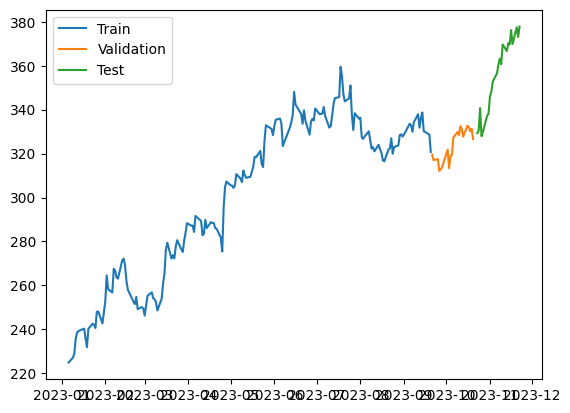

In [ ]:
# données sur 3: train, validation (to help train) and test
#le test est fait pour evaluer la performence du modele
q_80 = int(len(dates) * .8) #les 1ere 80% des lignes pour le training
q_90 = int(len(dates) * .9) #entre 80% et 90% pour valider

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80] #only up until 80%

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90] #entre q80 and q90
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:] #the rest 10% maaneha a partir men 90%

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential #to build a sequential model
from tensorflow.keras.optimizers import Adam  #optimization algo used in training neural networks.
from tensorflow.keras import layers #A module that provides a collection of layer classes that you use to build neural network models.

#Create a sequential model
model = Sequential([layers.Input((3,1)),  #3 because we're doing 3 days in the past and 1 for one feature needed
                   layers.LSTM(64), #the bigger the number (64) the more complicated model
                   layers.Dense(32, activation='relu'), #activation function
                   layers.Dense(32, activation='relu'), #for another stack
                   #now we'll specify the output of the model eli hia 1 output
                   layers.Dense(1) #activation function hia linear par defaut
                   ])

#compilation mtaa model / mse pour Mean Squared Error
model.compile(loss='mse',
              #specify the optimizer
              optimizer=Adam(learning_rate=0.001),
              #tells us on average how much we're off by rather than the MSE but we need to minimize the mse kima aamalna f loss
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) #100 runs through the dataset

Epoch 1/100
6/6 [==============================] - 2s 85ms/step - loss: 91565.2891 - mean_absolute_error: 300.4893 - val_loss: 104503.3672 - val_mean_absolute_error: 323.1895
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 91416.0078 - mean_absolute_error: 300.2399 - val_loss: 104393.6328 - val_mean_absolute_error: 323.0197
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 91310.8828 - mean_absolute_error: 300.0652 - val_loss: 104270.4766 - val_mean_absolute_error: 322.8291
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 91191.2031 - mean_absolute_error: 299.8652 - val_loss: 104139.1562 - val_mean_absolute_error: 322.6255
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 91068.7266 - mean_absolute_error: 299.6618 - val_loss: 104000.5469 - val_mean_absolute_error: 322.4107
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 90928.7031 - mean_absolute_error: 299.4267 - val_loss: 103

##**MSE**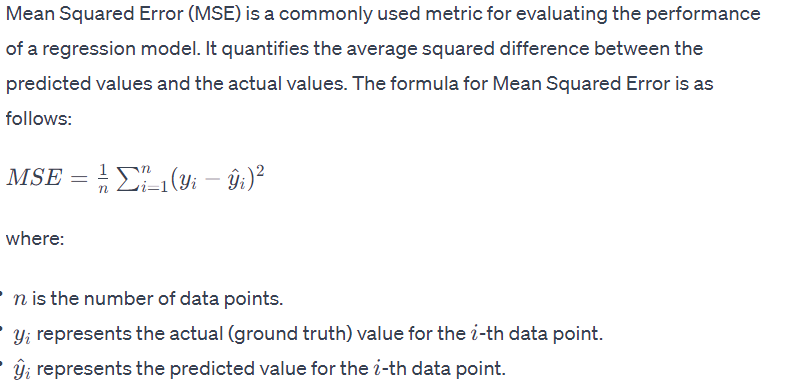

## **Role of Sequential**
context of deep learning typically refers to a linear stack of layers in a neural network where each layer has exactly one input tensor and one output tensor.
Here we will make a **model** that is **sequential** and built of many **layers**

6/6 [==============================] - 0s 3ms/step


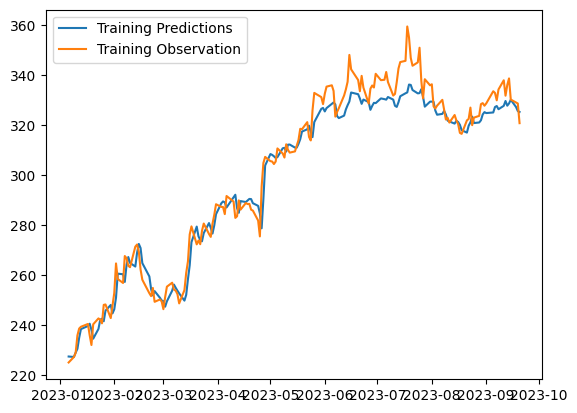

In [ ]:
#we're going to predict on the training set
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observation'])

#orangé houa chnoua sar reellement f stock market the past year
#the blue is what we predicted (target-3 w lokhring= w target)

#**Validation**

1/1 [==============================] - 0s 16ms/step


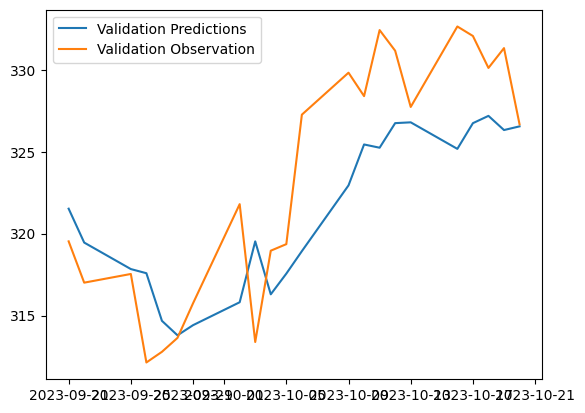

In [ ]:
#flatten method is often used to convert multi-dimensional arrays or tensors into one-dimensional arrays.
val_predictions = model.predict(X_val).flatten()


plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observation'])

#**Test**

1/1 [==============================] - 0s 15ms/step


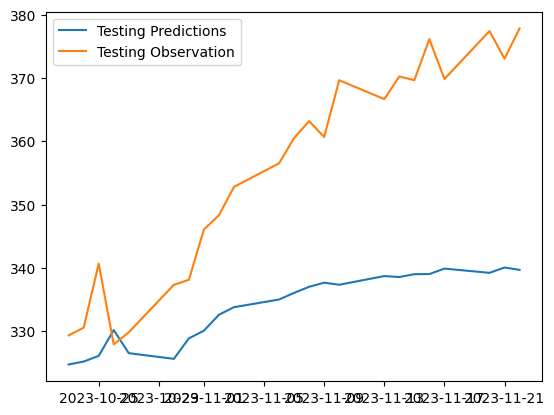

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observation'])

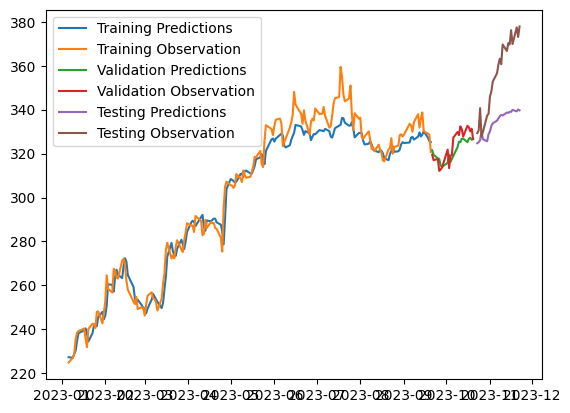

In [ ]:
#put the graphs in the same place
plt.plot(dates_train, train_predictions) #predictions
plt.plot(dates_train, y_train) #observations
plt.plot(dates_val, val_predictions) #predictions
plt.plot(dates_val, y_val) #observations
plt.plot(dates_test, test_predictions) #predictions
plt.plot(dates_test, y_test) #observations
plt.legend(['Training Predictions',
            'Training Observation',
            'Validation Predictions',
            'Validation Observation',
            'Testing Predictions',
            'Testing Observation'])
#brown is what really happened and the purple is what expected and predicted

### **Conclusion after the above graph**
Taking a range of time to train the LSTM model and predicting on it isn't the best solution for the testing part

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 18ms/step


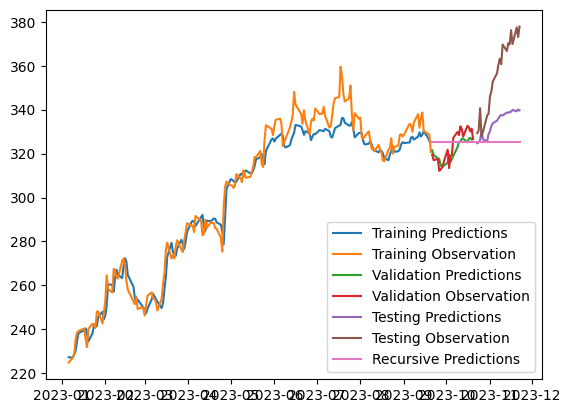

In [ ]:
#put the graphs in the same place
plt.plot(dates_train, train_predictions) #predictions
plt.plot(dates_train, y_train) #observations
plt.plot(dates_val, val_predictions) #predictions
plt.plot(dates_val, y_val) #observations
plt.plot(dates_test, test_predictions) #predictions
plt.plot(dates_test, y_test) #observations
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observation',
            'Validation Predictions',
            'Validation Observation',
            'Testing Predictions',
            'Testing Observation',
            'Recursive Predictions'])

the model has no idea of how to predict in the future

--------------------------------------------------------------------------------

LSTM model


In [ ]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf  # Import TensorFlow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming 'Close' is the only feature used
scaler = MinMaxScaler()
chakchouka['Close'] = scaler.fit_transform(chakchouka[['Close']])

# Function to create sequences
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Choose sequence length (number of days to look back)
sequence_length = 3

# Create sequences for training
X_train, y_train = create_sequences(chakchouka['Close'].values, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Create sequences for testing
X_test, y_test = create_sequences(chakchouka['Close'].values, sequence_length)

# Reshape input data for LSTM (samples, time steps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)

# Invert scaling for predicted data
predictions = scaler.inverse_transform(predictions)

# Evaluate the model as needed

Epoch 1/50
7/7 - 1s - loss: 0.3507 - 978ms/epoch - 140ms/step
Epoch 2/50
7/7 - 0s - loss: 0.2760 - 16ms/epoch - 2ms/step
Epoch 3/50
7/7 - 0s - loss: 0.2098 - 16ms/epoch - 2ms/step
Epoch 4/50
7/7 - 0s - loss: 0.1521 - 16ms/epoch - 2ms/step
Epoch 5/50
7/7 - 0s - loss: 0.0994 - 17ms/epoch - 2ms/step
Epoch 6/50
7/7 - 0s - loss: 0.0529 - 15ms/epoch - 2ms/step
Epoch 7/50
7/7 - 0s - loss: 0.0238 - 17ms/epoch - 2ms/step
Epoch 8/50
7/7 - 0s - loss: 0.0098 - 17ms/epoch - 2ms/step
Epoch 9/50
7/7 - 0s - loss: 0.0085 - 20ms/epoch - 3ms/step
Epoch 10/50
7/7 - 0s - loss: 0.0085 - 19ms/epoch - 3ms/step
Epoch 11/50
7/7 - 0s - loss: 0.0069 - 19ms/epoch - 3ms/step
Epoch 12/50
7/7 - 0s - loss: 0.0065 - 20ms/epoch - 3ms/step
Epoch 13/50
7/7 - 0s - loss: 0.0059 - 18ms/epoch - 3ms/step
Epoch 14/50
7/7 - 0s - loss: 0.0053 - 18ms/epoch - 3ms/step
Epoch 15/50
7/7 - 0s - loss: 0.0048 - 30ms/epoch - 4ms/step
Epoch 16/50
7/7 - 0s - loss: 0.0043 - 24ms/epoch - 3ms/step
Epoch 17/50
7/7 - 0s - loss: 0.0038 - 19ms/epo

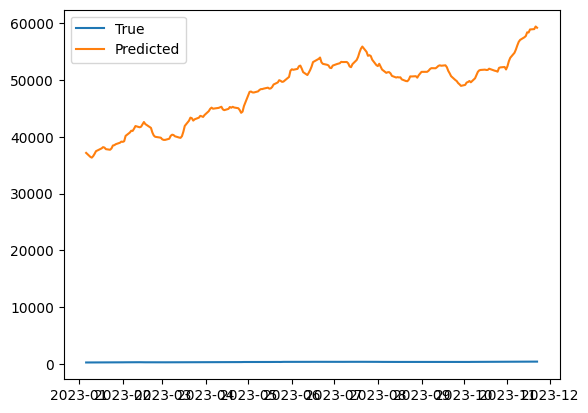

In [ ]:
# Assuming scaler is your MinMaxScaler
import numpy as np

# Reshape 1D arrays to 2D arrays
y_test_2d = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_2d = scaler.inverse_transform(predictions.reshape(-1, 1))

# Plot results
plt.plot(chakchouka.index[-len(y_test):], y_test_2d, label='True')
plt.plot(chakchouka.index[-len(y_test):], predictions_2d, label='Predicted')
plt.legend()
plt.show()

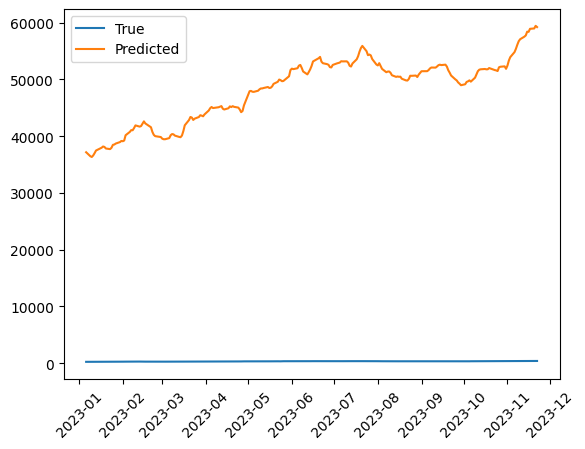

In [ ]:
# Plot results
plt.plot(chakchouka.index[-len(y_test):], y_test_2d, label='True')
plt.plot(chakchouka.index[-len(y_test):], predictions_2d, label='Predicted')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

plt.legend()
plt.show()